Eleonora Pura - 17-732-678

In [67]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
mpl.style.use('default')

<h1>A02.1 Average degree of the nearest neighbours</h1>

In [81]:
# Compute assortativity of g and grand
def compute_assortativity(g, grand):
    # Assortativity coefficient g
    r = nx.algorithms.assortativity.degree_assortativity_coefficient(g)
    print("Assortativitx of g: {}".format(r))

    # Assortativity coefficient grand
    rrand = nx.algorithms.assortativity.degree_assortativity_coefficient(grand)
    print("Assortativitx of grand: {}".format(rrand))
    
    
# Average degree of nearest neighbor plot
def plot_avg_degree_nn(g, dataset):
    avgdnn = nx.algorithms.assortativity.average_neighbor_degree(g).values()
    plt.title("Average degree of nearest neighbor of {}".format(dataset))
    plt.xlabel("knn(k)")
    plt.ylabel("k")
    my_bins = np.logspace(np.log10(min(avgdnn)), np.log10(max(avgdnn) + 1), 30) 
    plt.hist(avgdnn, bins = my_bins, density=True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()  

filenames = glob.glob('data/*.gml')

In [82]:
filenames

['data\\graph_AstroPh.gml',
 'data\\graph_celegansInteractomes.gml',
 'data\\graph_chess.gml',
 'data\\graph_CondMat.gml',
 'data\\graph_dolphins.gml',
 'data\\graph_eu_airlines.gml',
 'data\\graph_facebook.gml',
 'data\\graph_florentine_families.gml',
 'data\\graph_game_thrones.gml',
 'data\\graph_internet.gml',
 'data\\graph_jazz_collab.gml',
 'data\\graph_terrorists.gml']

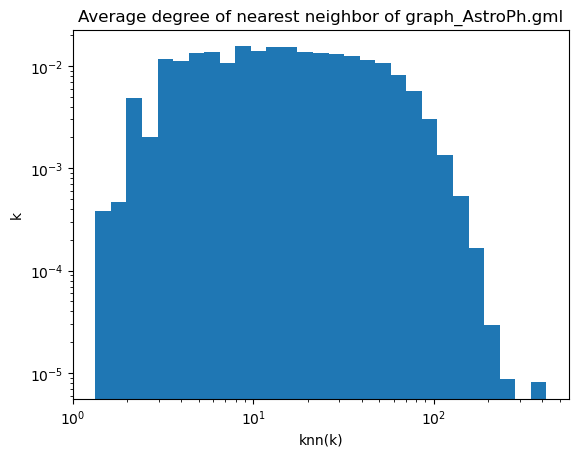

Assortativitx of g: 0.20131706127372678
Assortativitx of grand: 0.015142403772991345


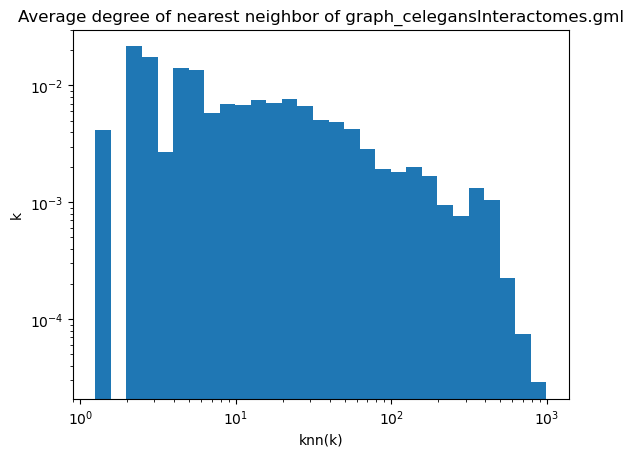

Assortativitx of g: 0.15169796960230705
Assortativitx of grand: -0.16103318481042767


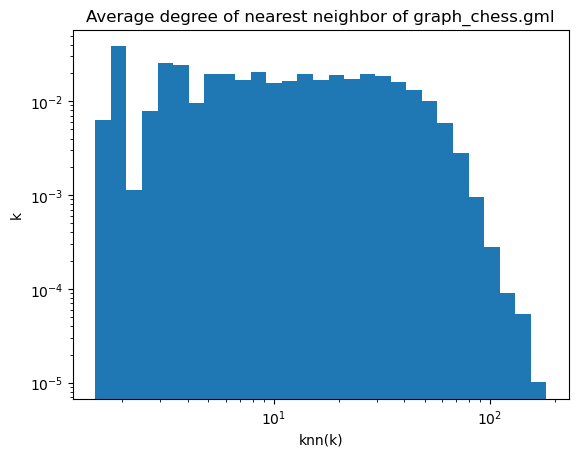

Assortativitx of g: 0.3705153782729769
Assortativitx of grand: 0.03301597264581297


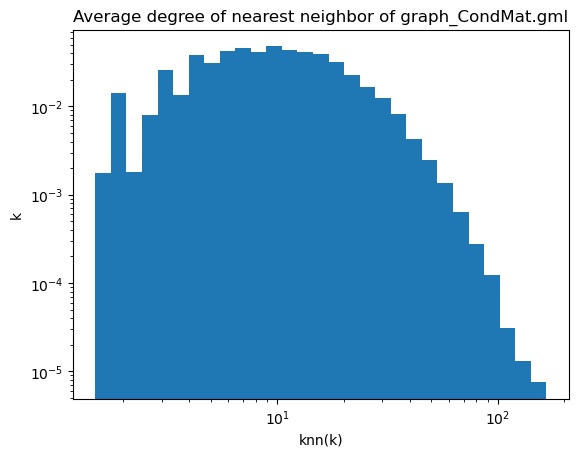

Assortativitx of g: 0.12528250398544855
Assortativitx of grand: 0.009835195850097934


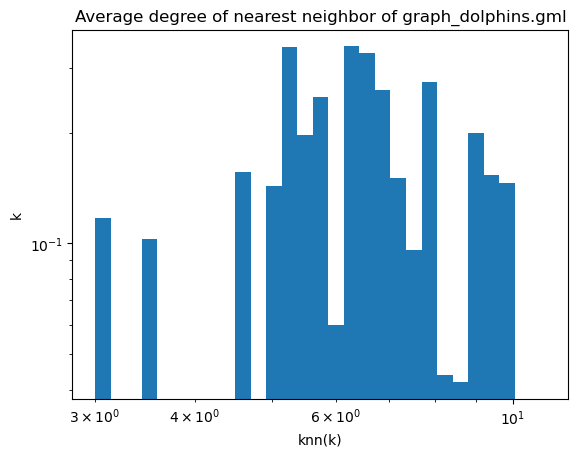

Assortativitx of g: -0.04359402821531255
Assortativitx of grand: -0.1289631557320911


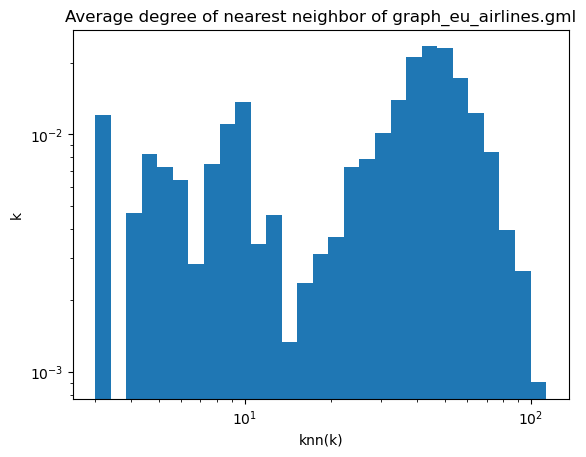

Assortativitx of g: -0.15180413274193835
Assortativitx of grand: -0.2202430538074083


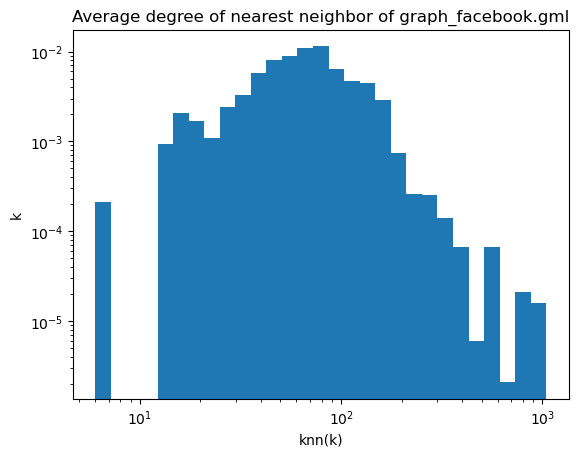

Assortativitx of g: 0.06357722918564943
Assortativitx of grand: -0.032044425485226125


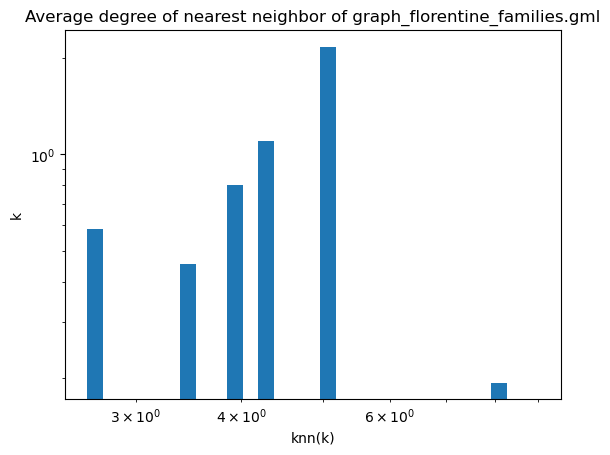

Assortativitx of g: -0.47862867319679353
Assortativitx of grand: -0.20213713268032174


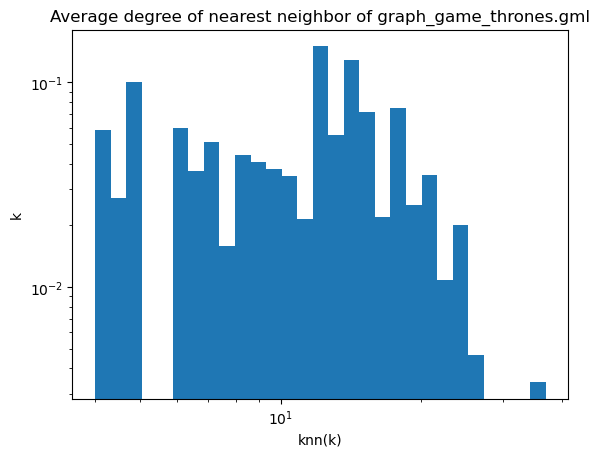

Assortativitx of g: -0.1307696836693023
Assortativitx of grand: -0.18346781190233002


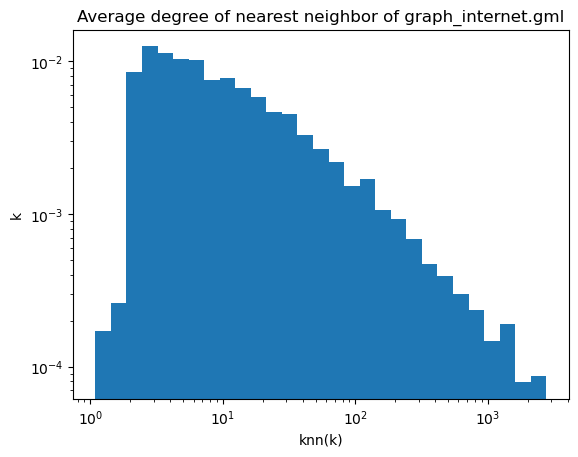

Assortativitx of g: -0.21486656615730235
Assortativitx of grand: -0.19746798011615768


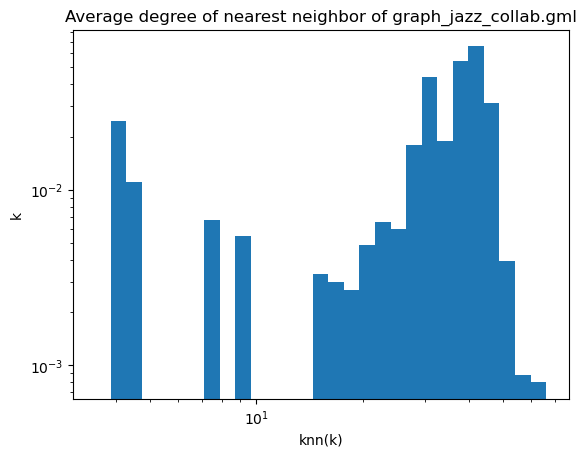

Assortativitx of g: 0.020237399275047713
Assortativitx of grand: -0.07504575712483051


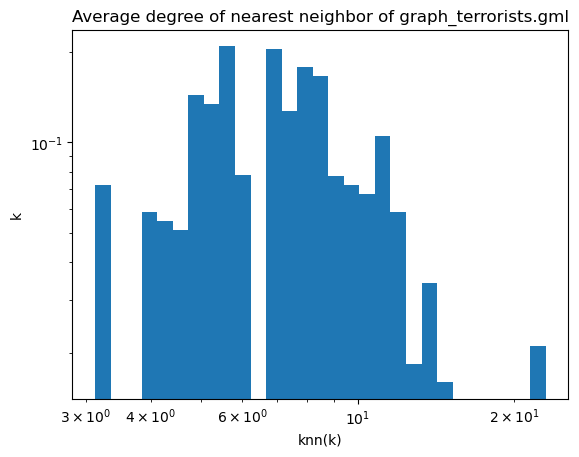

Assortativitx of g: -0.08047566178575725
Assortativitx of grand: -0.08450887152523236


In [83]:
for i in range(len(filenames)):
    filename = filenames[i][5:]
    g = nx.read_gml("data/{}".format(filename))
    grand = nx.algorithms.smallworld.random_reference(g, niter = 1, connectivity=False)
    nodes = [i for i in g.nodes()]
    degrees = [g.degree(i) for i in nodes]
    plot_avg_degree_nn(g, filename)
    compute_assortativity(g, grand)

<h1>A02.2 Clustering and randomisation</h1>

In [84]:
def show_degree_distribution(degrees, dataset):
    plt.title("Degree Distributions of {}".format(dataset))
    plt.xlabel("k")
    plt.ylabel("P(K)")
    # double log scale?
    my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) + 1), 30) 
    plt.hist(degrees, bins = my_bins, density=True)
    plt.xscale('log')
    plt.yscale('log')
    plt.axvline(x=np.average(degrees), color="r", label="avgdegree={}".format(round(np.average(degrees), 3)))
    plt.legend()
    plt.show()

def clustering_comparison(x, y, dataset):
    plt.title("Clustering comparison of {}".format(dataset))
    plt.scatter(x, y)
    plt.xlabel("Ci")
    plt.ylabel("Crndi")
    plt.xscale('linear')
    plt.yscale('linear')
    plt.show()

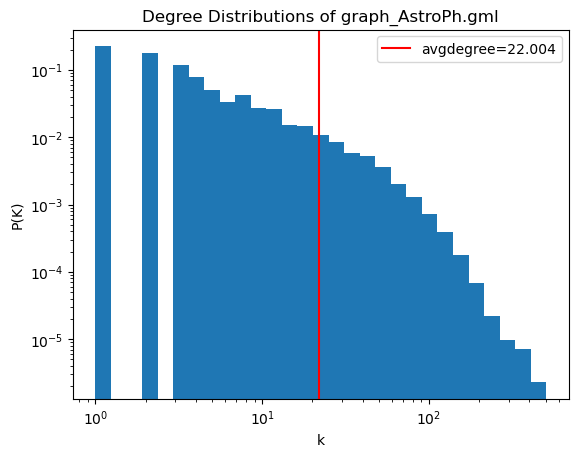

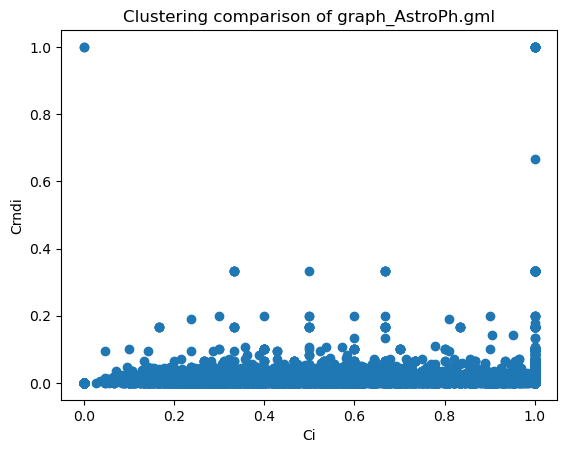

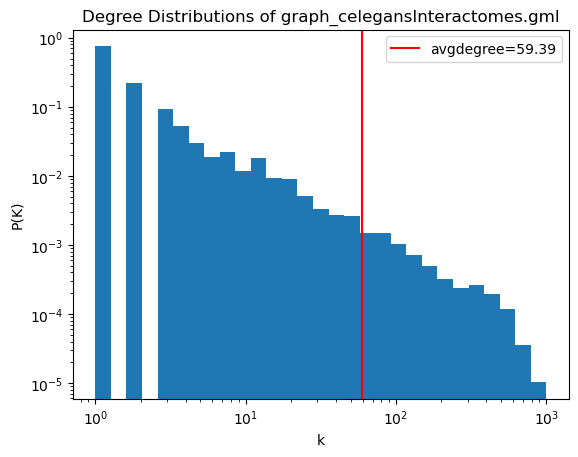

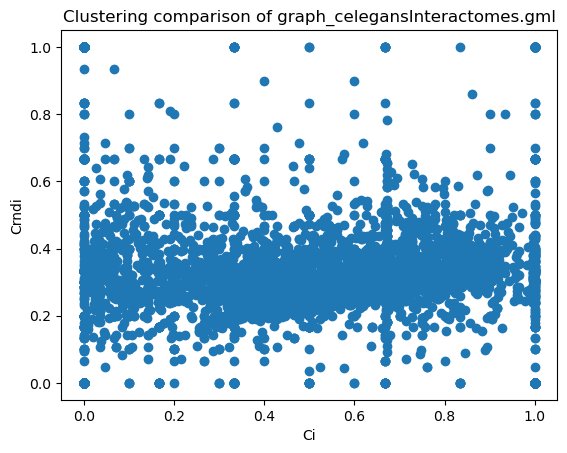

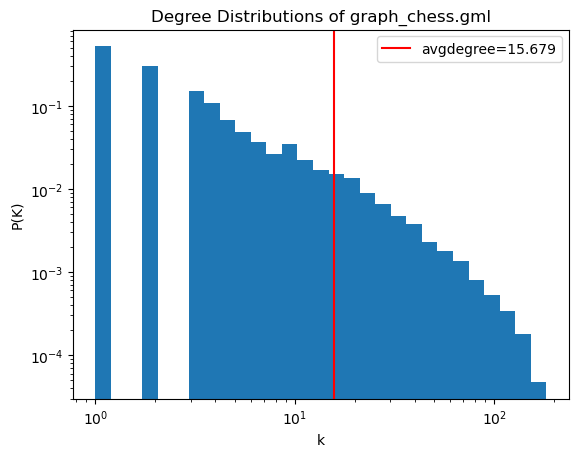

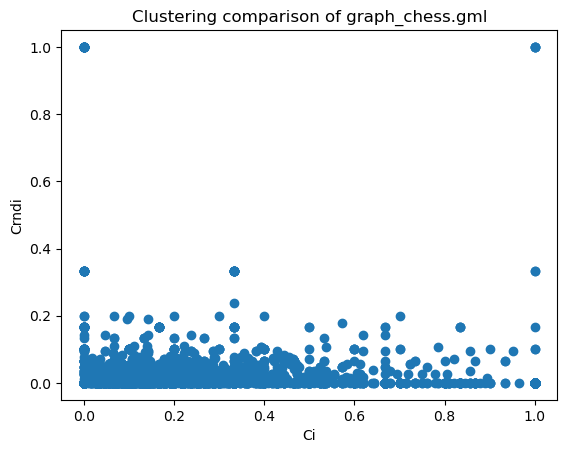

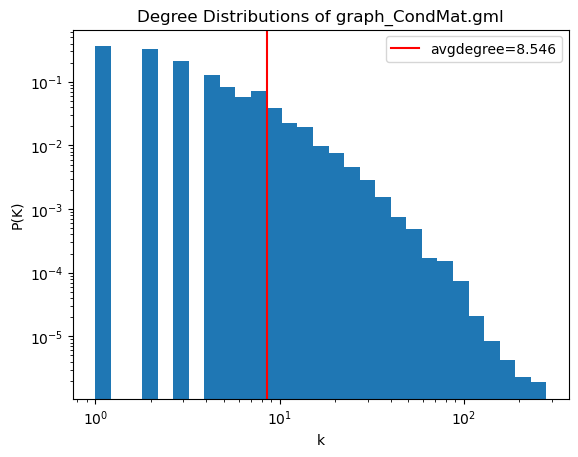

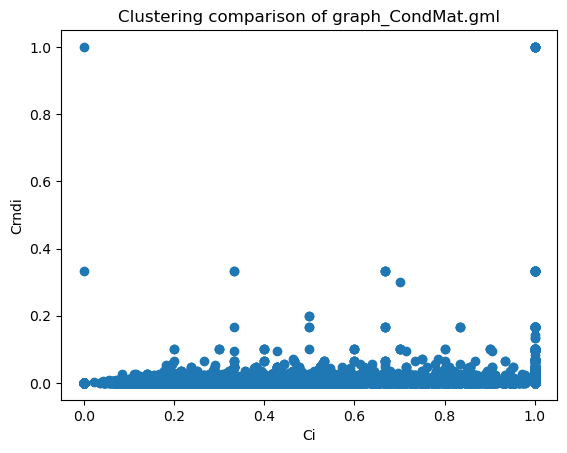

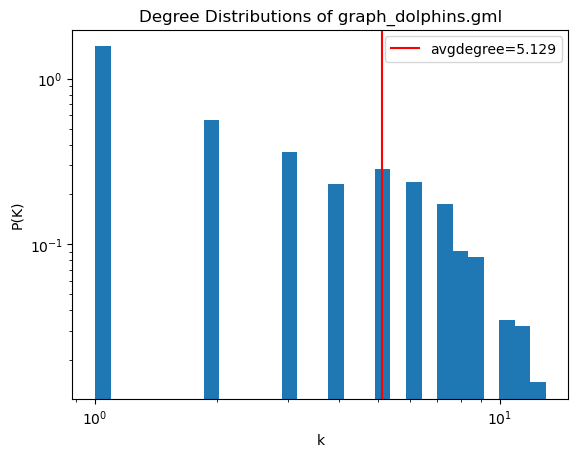

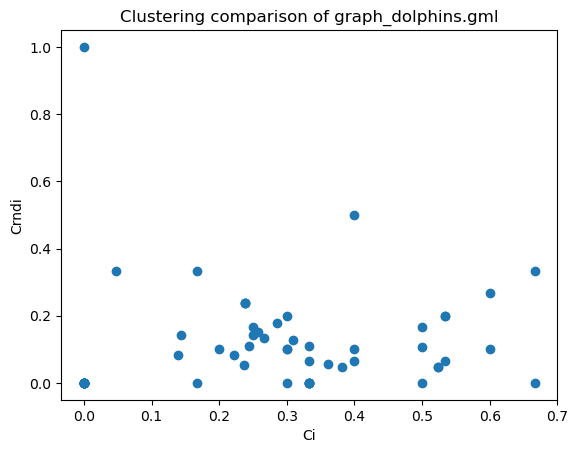

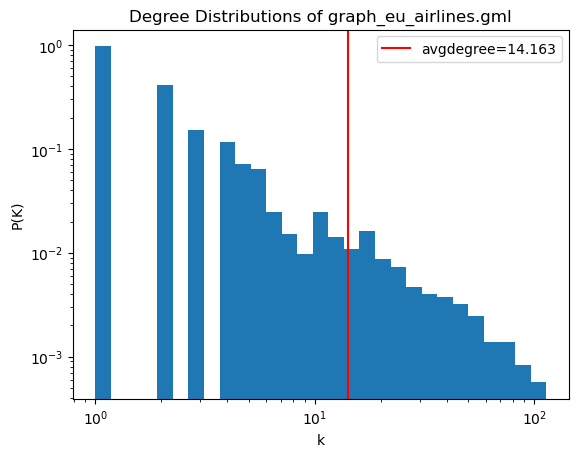

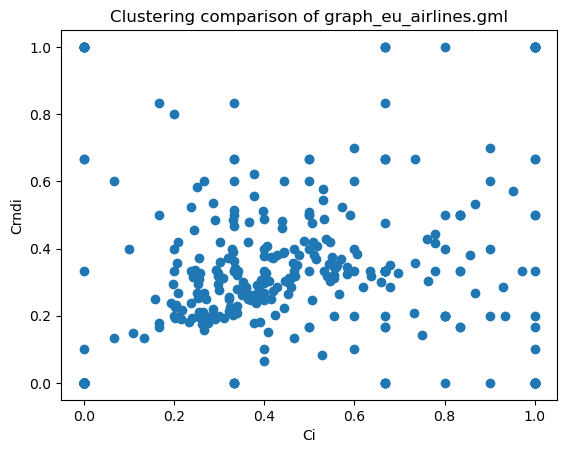

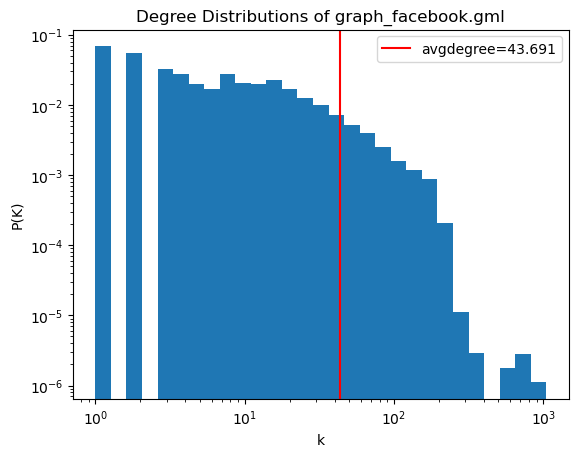

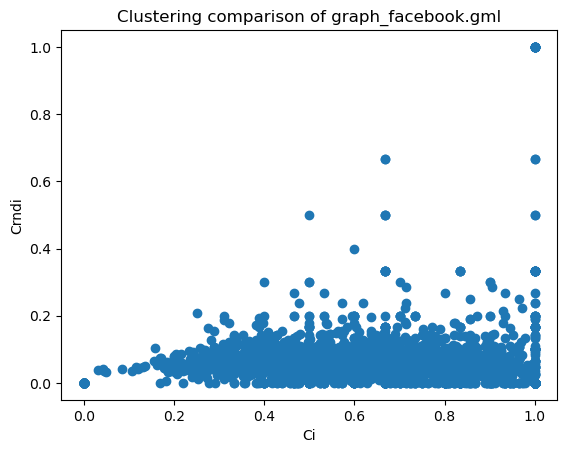

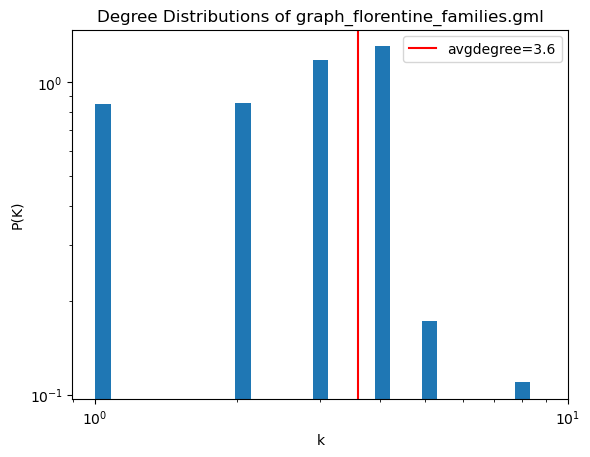

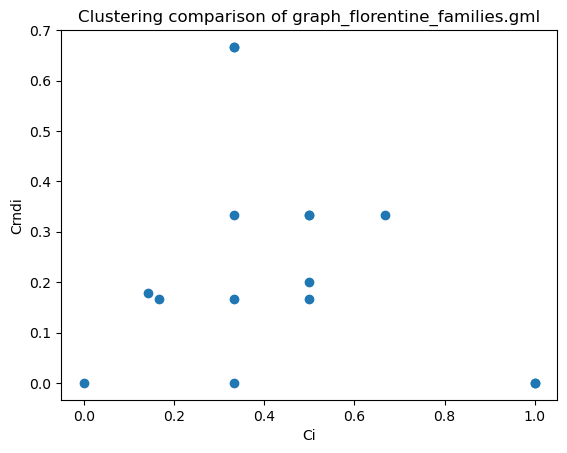

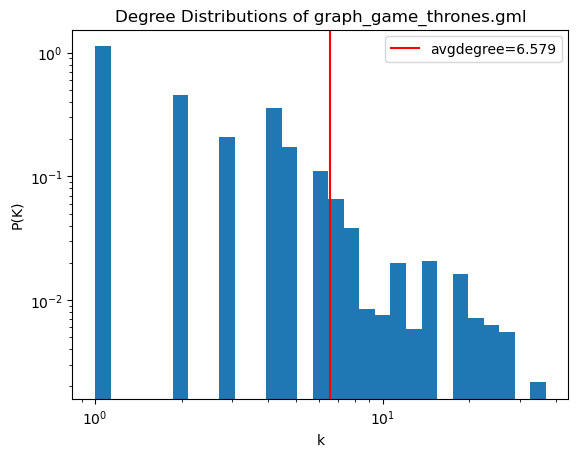

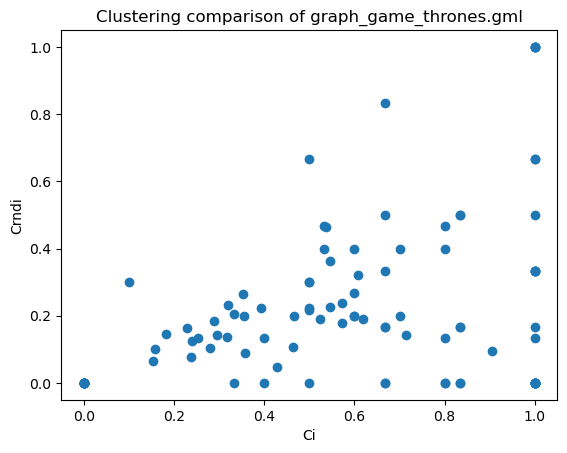

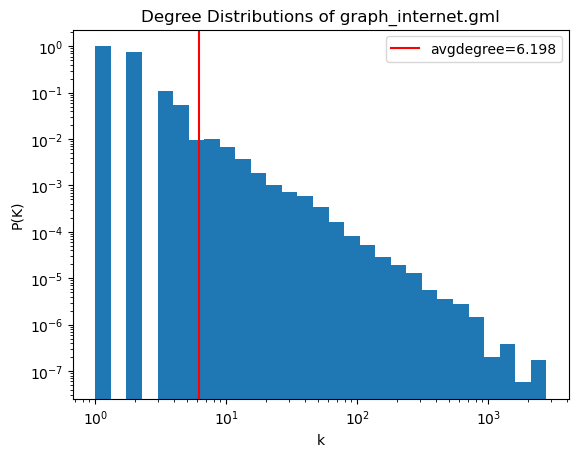

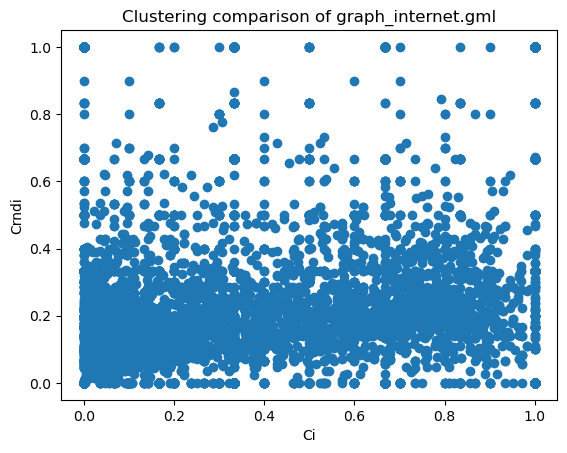

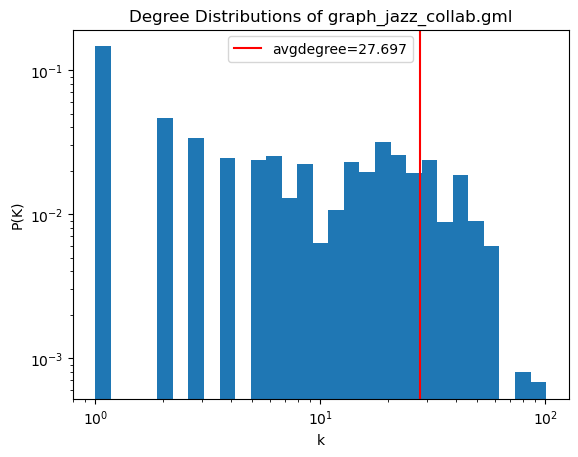

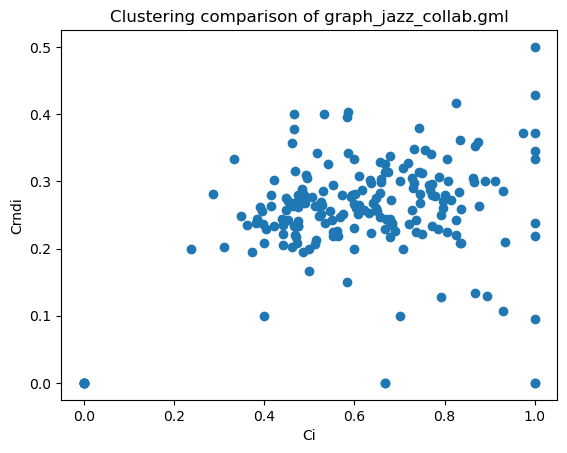

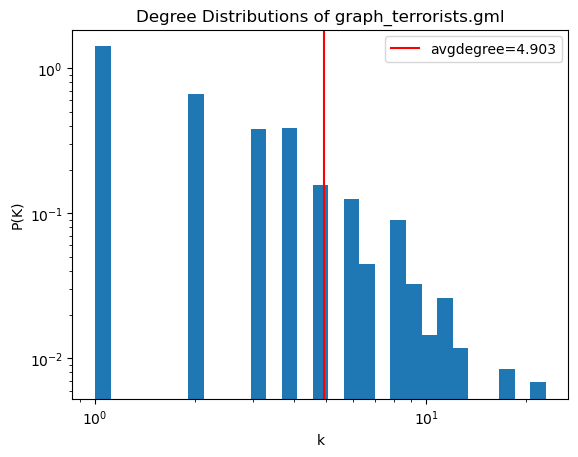

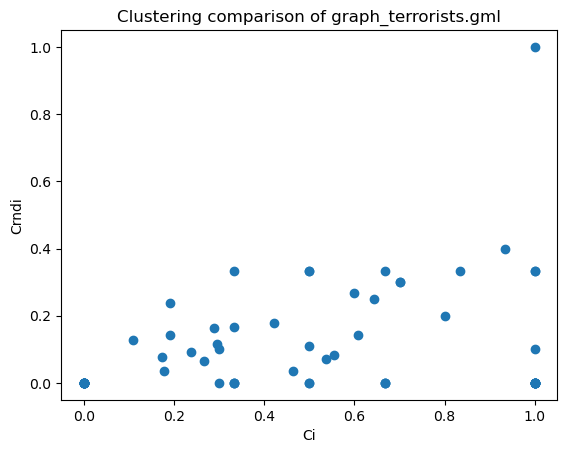

In [87]:
for i in range(len(filenames)):
    filename = filenames[i][5:]
    g = nx.read_gml("data/{}".format(filename))
    grand = nx.algorithms.smallworld.random_reference(g, niter = 1, connectivity=False)
    nodes = [i for i in g.nodes()]
    degrees = [g.degree(i) for i in nodes]
    show_degree_distribution(degrees, filename)
    c = nx.algorithms.cluster.clustering(g).values()
    crand = nx.algorithms.cluster.clustering(grand).values()
    clustering_comparison(c, crand, filename)
    